In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import scipy
from statsmodels.stats.weightstats import *

C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Ювелирный магазин, данные - Лист1.csv')
df

,date,Variant,cnt(addToCart),sum(addToCartItems)
0,2019-09-01,90,56,110247
1,2019-09-01,10,52,163098
2,2019-09-02,10,59,93317
3,2019-09-02,90,56,26457
4,2019-09-03,90,54,56418
5,2019-09-03,10,46,16985
6,2019-09-04,10,46,31152
7,2019-09-04,90,59,27379
8,2019-09-05,90,49,17503
9,2019-09-05,10,82,32306


In [5]:
df.loc[df['Variant'] == 10, 'Variant'] = 'A' 
df.loc[df['Variant'] == 90, 'Variant'] = 'B' 
df

,date,Variant,cnt(addToCart),sum(addToCartItems)
0,2019-09-01,B,56,110247
1,2019-09-01,A,52,163098
2,2019-09-02,A,59,93317
3,2019-09-02,B,56,26457
4,2019-09-03,B,54,56418
5,2019-09-03,A,46,16985
6,2019-09-04,A,46,31152
7,2019-09-04,B,59,27379
8,2019-09-05,B,49,17503
9,2019-09-05,A,82,32306


In [22]:
df_price = df.groupby(['Variant', 'date']).\
agg({'sum(addToCartItems)':'max'})
df_price

sum(addToCartItems)
Variant date                           
A       2019-09-01               163098
        2019-09-02                93317
        2019-09-03                16985
        2019-09-04                31152
        2019-09-05                32306
        2019-09-06                20049
        2019-09-07                11309
        2019-09-08                27254
        2019-09-09                43488
        2019-09-10                18025
        2019-09-11                32462
        2019-09-12                24390
        2019-09-13                12932
        2019-09-14                47608
        2019-09-15                33120
        2019-09-16                 7048
        2019-09-17                22376
        2019-09-18                83472
        2019-09-19                61208
        2019-09-20                35456
        2019-09-21                14104
        2019-09-22                34018
        2019-09-23                38863
        2019-09-24                42514
        2019-09-25                12268
B       2019-09-01               110247
        2019-09-02                26457
        2019-09-03                56418
        2019-09-04                27379
        2019-09-05                17503
        2019-09-06                16466
        2019-09-07                16524
        2019-09-08                 7142
        2019-09-09                18418
        2019-09-10                28473
        2019-09-11                10671
        2019-09-12                15106
        2019-09-13                32116
        2019-09-14                16529
        2019-09-15                 5191
        2019-09-16                22530
        2019-09-17                35122
        2019-09-18               102890
        2019-09-19                27022
        2019-09-20                15344
        2019-09-21                31692
        2019-09-22                17602
        2019-09-23                12674
        2019-09-24                58581
        2019-09-25               286956

In [21]:
df_cnt = df.groupby(['Variant', 'date']).\
agg({'cnt(addToCart)':'max'})
df_cnt

cnt(addToCart)
Variant date                      
A       2019-09-01              52
        2019-09-02              59
        2019-09-03              46
        2019-09-04              46
        2019-09-05              82
        2019-09-06              43
        2019-09-07              22
        2019-09-08              40
        2019-09-09              48
        2019-09-10              42
        2019-09-11              40
        2019-09-12              48
        2019-09-13              32
        2019-09-14              36
        2019-09-15              48
        2019-09-16              12
        2019-09-17              40
        2019-09-18              64
        2019-09-19              56
        2019-09-20             156
        2019-09-21              24
        2019-09-22              44
        2019-09-23              39
        2019-09-24              54
        2019-09-25              22
B       2019-09-01              56
        2019-09-02              56
        2019-09-03              54
        2019-09-04              59
        2019-09-05              49
        2019-09-06              38
        2019-09-07              26
        2019-09-08              30
        2019-09-09              53
        2019-09-10              47
        2019-09-11              27
        2019-09-12              40
        2019-09-13              44
        2019-09-14              38
        2019-09-15              20
        2019-09-16              46
        2019-09-17              54
        2019-09-18              90
        2019-09-19              32
        2019-09-20              26
        2019-09-21              66
        2019-09-22              46
        2019-09-23              36
        2019-09-24              69
        2019-09-25              78

In [32]:
df_price.groupby('Variant')['sum(addToCartItems)'].describe()

,count,mean,std,min,25%,50%,75%,max
Variant,,,,,,,,
A,25.0,38352.88,33448.994095,7048.0,18025.0,32306.0,42514.0,163098.0
B,25.0,40602.12,57678.076016,5191.0,16466.0,22530.0,32116.0,286956.0


In [33]:
df_cnt.groupby('Variant')['cnt(addToCart)'].describe()

,count,mean,std,min,25%,50%,75%,max
Variant,,,,,,,,
A,25.0,47.8,26.843683,12.0,39.0,44.0,52.0,156.0
B,25.0,47.2,17.036725,20.0,36.0,46.0,56.0,90.0


Text(0, 0.5, '# записей')

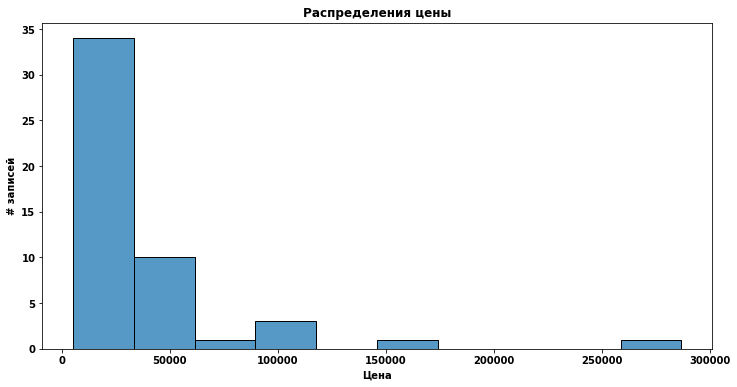

In [19]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.histplot(data=df, x='sum(addToCartItems)', bins=10)
ax.set_title('Распределения цены')
ax.set_xlabel('Цена')
ax.set_ylabel('# записей')

Text(0, 0.5, '# записей')

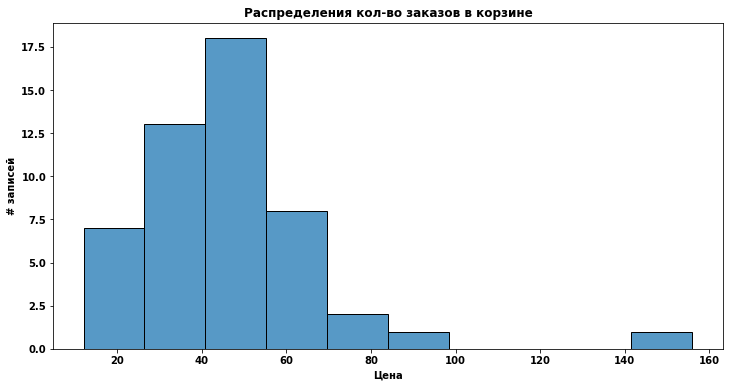

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.histplot(data=df, x='cnt(addToCart)', bins=10)
ax.set_title('Распределения кол-во заказов в корзине')
ax.set_xlabel('Цена')
ax.set_ylabel('# записей')

In [24]:
df['sum_for_one'] = df['sum(addToCartItems)'] / df['cnt(addToCart)']

In [26]:
def bootstrap(arr,n=100,N_TRIAL = 1000,func = np.mean):
    res = []
    n = min(len(arr),n)
    # Инициализируем цикл попыток
    for _ in range(N_TRIAL):
        # Делаем подвыборку размера n
        if len(arr.shape)>1:
            ind = np.random.choice(np.arange(arr.shape[0]), size = (n,))
            subsample = arr.iloc[ind]
        else:
            subsample = np.random.choice(arr, size = (n,))
        # рассчитываем статистику
        stat = func(subsample)
        res.append(stat)
    return res # shape (N_TRIAL,)

In [27]:
samples_a = bootstrap(df_price.query("Variant=='A'")['sum(addToCartItems)'],N_TRIAL = 3000)
samples_b = bootstrap(df_price.query("Variant=='B'")['sum(addToCartItems)'],N_TRIAL = 3000)

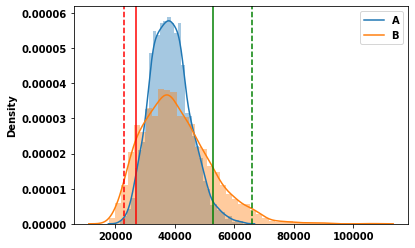

In [28]:
import warnings 
warnings.filterwarnings("ignore")

ax = sns.distplot(samples_a,label = 'A')
sns.distplot(samples_b,ax = ax,label = 'B')
ax.legend(['A','B'])
ax.axvline(np.percentile(samples_a,2.5),linestyle = '-',color='r')
ax.axvline(np.percentile(samples_a,97.5),linestyle = '-',color='g')

ax.axvline(np.percentile(samples_b,2.5),linestyle = '--',color='r')
ax.axvline(np.percentile(samples_b,97.5),linestyle = '--',color='g')

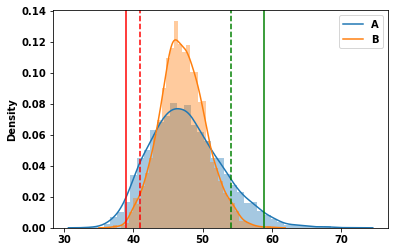

In [29]:
samples_a = bootstrap(df_cnt.query("Variant=='A'")['cnt(addToCart)'],N_TRIAL = 3000)
samples_b = bootstrap(df_cnt.query("Variant=='B'")['cnt(addToCart)'],N_TRIAL = 3000)

ax = sns.distplot(samples_a,label = 'A')
sns.distplot(samples_b,ax = ax,label = 'B')
ax.legend(['A','B'])
ax.axvline(np.percentile(samples_a,2.5),linestyle = '-',color='r')
ax.axvline(np.percentile(samples_a,97.5),linestyle = '-',color='g')

ax.axvline(np.percentile(samples_b,2.5),linestyle = '--',color='r')
ax.axvline(np.percentile(samples_b,97.5),linestyle = '--',color='g')

Различии в экспериментах не наблюадется, видим что центры распределения совпадают.